#  Step 1: Importing the Libraries

In [59]:
import pandas as pd
import numpy as np  
import sklearn
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from math import sqrt

# Step 2: Importing the dataset

In [60]:
df = pd.read_csv("~\Desktop\SA_Rainfall_1901-2016.csv")

In [61]:
df.head()

,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Annual,Jan-Feb,Mar-May,Jun-Sept,Oct-Dec
0,1901,60.6,85.9,80.5,40.7,14.4,12.6,9.4,15.6,53.8,63.0,64.5,56.4,557.3,146.4,135.6,91.3,183.9
1,1902,57.4,52.3,70.4,31.1,7.6,19.1,10.1,17.6,45.1,31.9,33.1,51.4,427.1,109.7,109.1,91.9,116.4
2,1903,39.9,41.3,25.3,40.5,20.0,14.9,7.3,10.6,7.3,30.2,63.4,44.1,344.9,81.2,85.9,40.1,137.7
3,1904,97.4,77.0,73.7,20.9,11.3,12.5,7.4,10.4,16.0,35.2,40.9,40.5,443.4,174.4,105.9,46.3,116.7
4,1905,54.6,64.1,60.2,30.7,25.3,16.0,3.7,13.6,35.8,28.4,47.1,61.5,441.0,118.7,116.2,69.1,137.0


In [62]:
#checking null values in dataset
df.isnull().sum()

Year        0
JAN         0
FEB         0
MAR         0
APR         0
MAY         0
JUN         0
JUL         0
AUG         0
SEP         0
OCT         0
NOV         0
DEC         0
Annual      0
Jan-Feb     0
Mar-May     0
Jun-Sept    0
Oct-Dec     0
dtype: int64

In [63]:
df.shape

(116, 18)

In [64]:
#checking data types of the attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 18 columns):
Year        116 non-null int64
JAN         116 non-null float64
FEB         116 non-null float64
MAR         116 non-null float64
APR         116 non-null float64
MAY         116 non-null float64
JUN         116 non-null float64
JUL         116 non-null float64
AUG         116 non-null float64
SEP         116 non-null float64
OCT         116 non-null float64
NOV         116 non-null float64
DEC         116 non-null float64
Annual      116 non-null float64
Jan-Feb     116 non-null float64
Mar-May     116 non-null float64
Jun-Sept    116 non-null float64
Oct-Dec     116 non-null float64
dtypes: float64(17), int64(1)
memory usage: 16.4 KB


In [65]:
df.describe()

,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Annual,Jan-Feb,Mar-May,Jun-Sept,Oct-Dec
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,1958.500000,67.430172,65.481034,62.726207,34.612931,19.708621,14.233621,12.568103,15.218103,22.048276,39.360345,54.542241,61.898276,469.856034,132.911207,117.058621,64.081034,155.799138
std,33.630343,24.181996,24.602092,22.853129,15.979697,10.222997,6.982997,6.676664,9.304423,13.289646,14.557985,18.986710,20.437748,72.955835,41.191974,34.535922,20.868386,33.866101
min,1901.000000,28.900000,25.400000,16.500000,5.600000,2.800000,3.000000,2.200000,2.900000,3.700000,12.500000,16.100000,19.200000,312.800000,57.700000,47.700000,25.200000,77.200000
25%,1929.750000,49.600000,46.325000,45.700000,21.200000,11.775000,9.275000,7.800000,8.825000,13.450000,28.800000,40.350000,47.775000,417.775000,102.850000,93.675000,50.675000,132.800000
50%,1958.500000,61.350000,62.650000,58.350000,33.300000,19.150000,12.750000,11.350000,13.150000,19.600000,37.350000,53.250000,58.900000,461.850000,126.900000,110.450000,60.700000,156.100000
75%,1987.250000,83.500000,81.625000,78.100000,44.075000,25.750000,18.825000,16.725000,18.625000,27.500000,48.450000,66.200000,77.325000,518.025000,165.800000,134.175000,75.475000,178.750000
max,2016.000000,137.800000,126.800000,143.800000,90.900000,47.500000,34.600000,31.700000,49.000000,85.300000,74.600000,102.000000,116.600000,676.500000,246.500000,240.100000,135.600000,230.600000


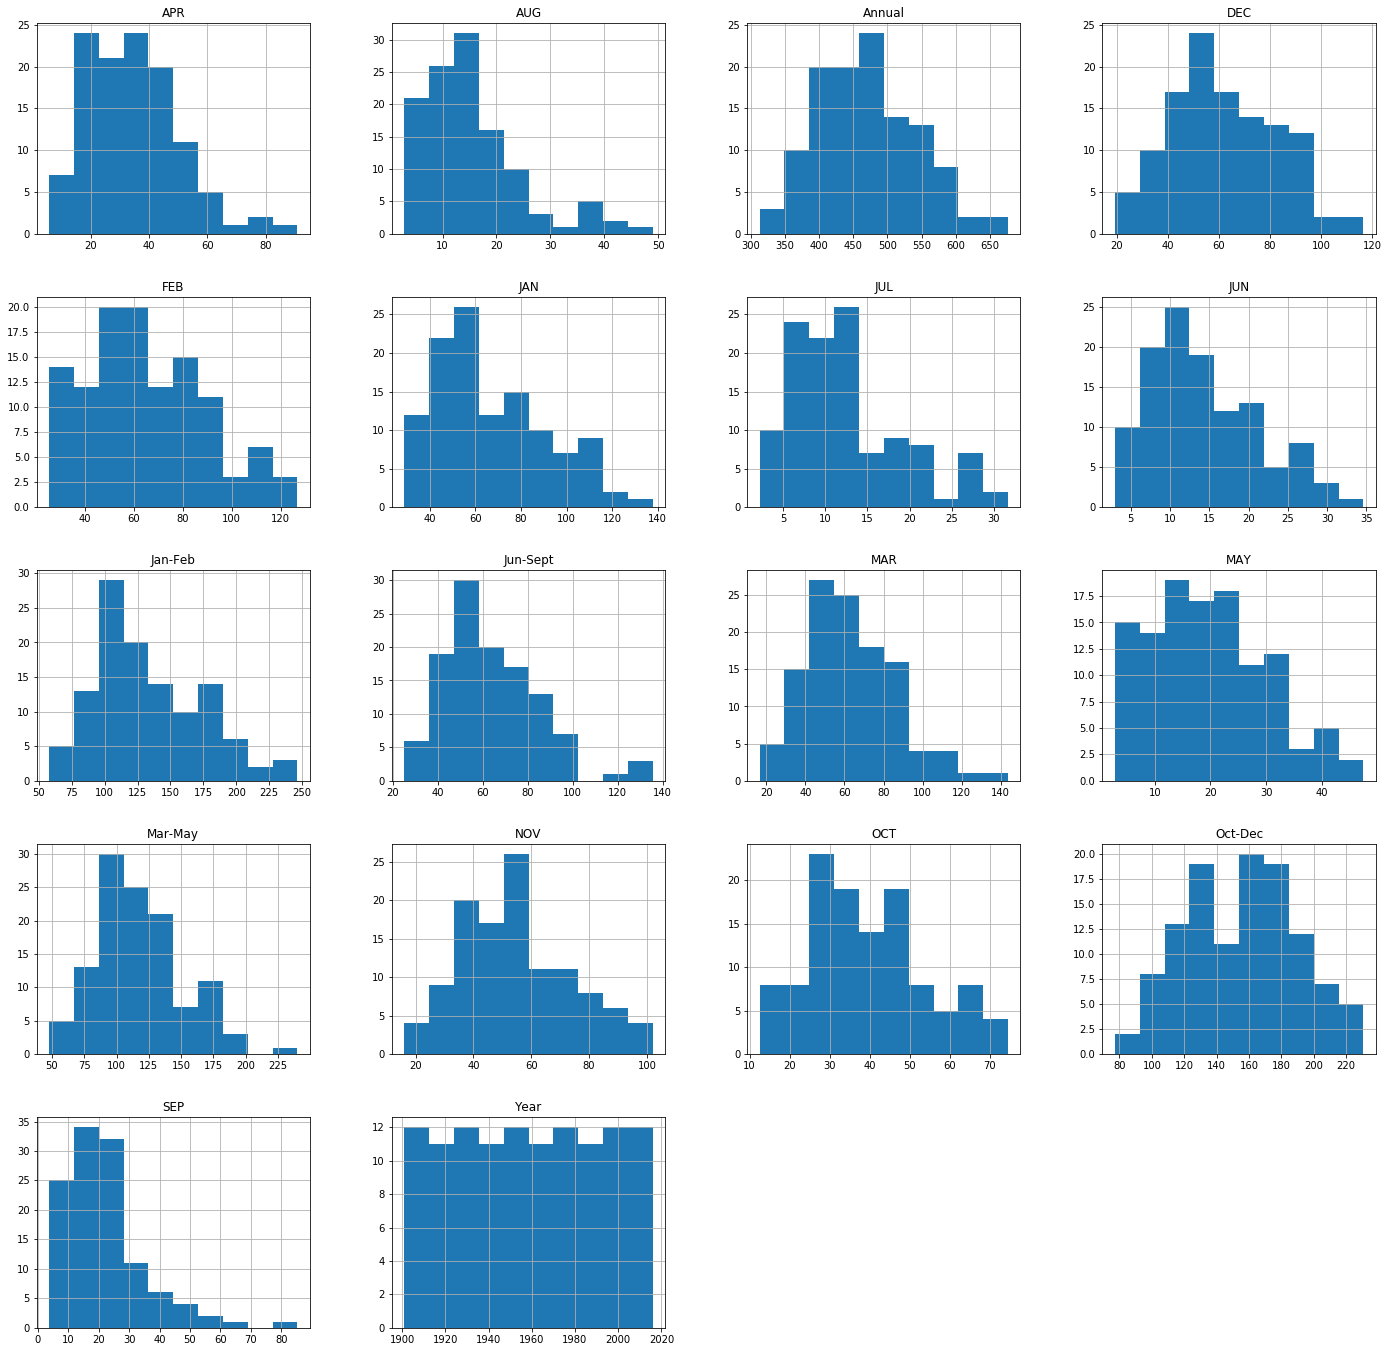

In [66]:
df.hist(figsize=(24,24));

In [67]:
y=df['Annual']
x=df[['Jan-Feb','Mar-May','Jun-Sept','Oct-Dec']]

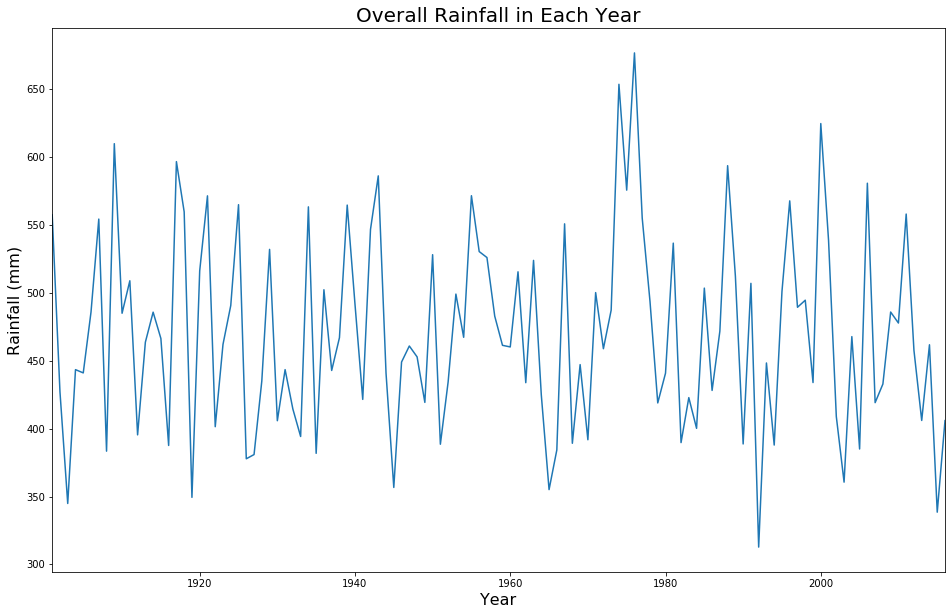

In [68]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
dfg = df.groupby('Year').sum()['Annual']
dfg.plot('line', title='Overall Rainfall in Each Year', fontsize=10)
plt.ylabel('Rainfall (mm)')
ax.title.set_fontsize(20)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)


Text(0.5, 0, 'Year')

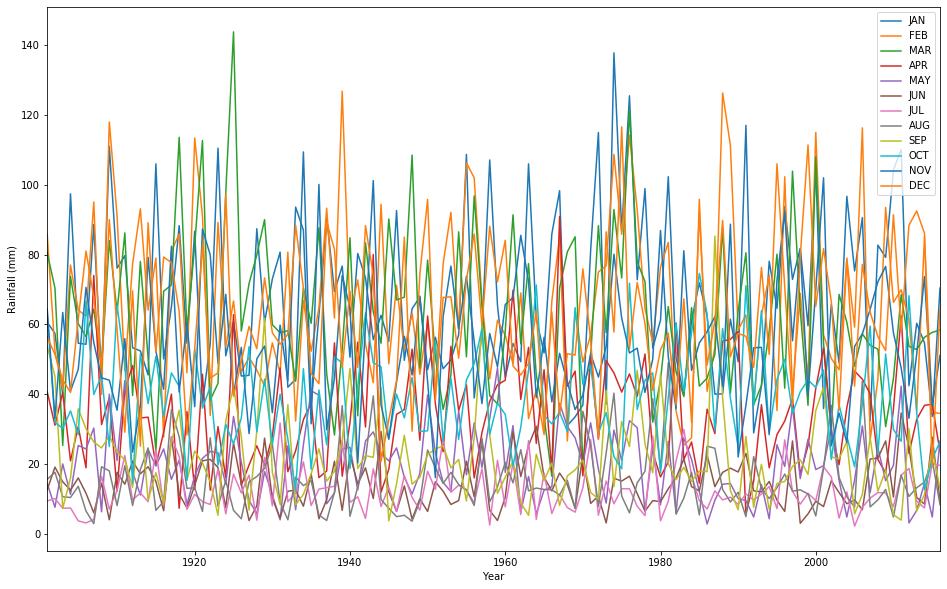

In [69]:
df[["Year","JAN", "FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"]].groupby("Year").sum().plot(figsize=(16,10));
plt.ylabel("Rainfall (mm)")
plt.xlabel("Year")

#    Step 3: Splitting the dataset into the Training set and Test set

In this step, we have to split the dataset into the Training set, on which the Linear Regression model will be trained and the Test set, on which the trained model will be applied to visualize the results. In this the test_size=0.3 denotes that 30% of the data will be kept as the Test set and the remaining 70% will be used for training as the Training set.

In [70]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,shuffle=False)

#  Step 4:  Simple Linear Regression model 

In [71]:
# Fitting Simple Linear Regression to training set
from sklearn import linear_model
lm=linear_model.LinearRegression()
lm.fit(train_x,train_y)
# Predicting the test set results
pred=lm.predict(test_x)

In [72]:
# Evaluating the model
print("Mean Squared Error =",mean_squared_error(test_y,pred))
print("Root Mean Squared Error =",np.sqrt(mean_squared_error(test_y,pred)))
print("Mean Absolute Error =",mean_absolute_error(test_y,pred))
print("r2_score =",r2_score(test_y,pred))

Mean Squared Error = 0.003377175703537887
Root Mean Squared Error = 0.05811347265082243
Mean Absolute Error = 0.041012487787484786
r2_score = 0.9999993550064146


# Step 5: Support Vector Regression Model

In [73]:
y=df['Annual']
X=df[['Jan-Feb','Mar-May','Jun-Sept','Oct-Dec']]

In [74]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0) 

In [75]:
# Fitting the Support Vector Regression to training set
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)
# Predicting the test set results
y_pred = svr.predict(X_test)

C:\Users\Thola\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [76]:
# Evaluating the model
print("Mean Squared Error =",mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error =",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Mean Absolute Error =",mean_absolute_error(y_test,y_pred))
print("r2_score =",r2_score(y_test,y_pred))

Mean Squared Error = 5529.707910714288
Root Mean Squared Error = 74.36200582766907
Mean Absolute Error = 58.812142857142874
r2_score = -0.144851033281008


# Step 6: Random Forest Regression Model

In [77]:
y=df['Annual']
X=df[['Jan-Feb','Mar-May','Jun-Sept','Oct-Dec']]

In [78]:
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [79]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [80]:
# Fitting the Random Forest Regression to training set
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
# Predicting the test set results
y_pred = regressor.predict(X_test)

In [81]:
# Evaluating the model
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("r2_score =",r2_score(y_test,y_pred))

Mean Absolute Error: 25.322083333333335
Mean Squared Error: 1136.4407437500001
Root Mean Squared Error: 33.71113679112587
r2_score = 0.7755894551987341


# Step 7: Models Comparison

In [82]:
data = {'Regression Models':['Simple Linear Regression','Support Vector Regression','Random Forest Regression'], 
        'Mean Absolute Error':[0.041012487787484786,58.812142857142874 ,33.71113679112587],'R2 Score':[0.9999993550064146,-0.144851033281008,0.7755894551987341]} 
df_1 = pd.DataFrame(data) 
                            
                            
  

In [83]:
df_1

,Regression Models,Mean Absolute Error,R2 Score
0,Simple Linear Regression,0.041012,0.999999
1,Support Vector Regression,58.812143,-0.144851
2,Random Forest Regression,33.711137,0.775589


In [84]:
df_2 = pd.DataFrame({
    'Regression Models':['SLR','SVR','RFR'],
    'Mean Absolute Error':[0.04,58.8,33.7]})


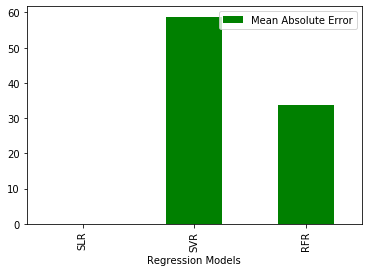

In [85]:
df_2.plot(kind='bar',x='Regression Models',y='Mean Absolute Error',color='green')
plt.show()

Random Forest perfoms better than Support Vector Regression.
Mean Absolute Error is very high which means machine learning models won’t work well for prediction